In [7]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt

In [39]:
dta = pd.read_csv(os.path.join(path, 'programming language trend over time.csv'))
dta.describe()

,Python,Java,C++
count,262.000000,262.000000,262.000000
mean,68.965649,48.851145,19.290076
std,14.073519,6.925768,3.805599
min,37.000000,28.000000,12.000000
25%,58.000000,44.000000,17.000000
50%,65.500000,48.000000,18.000000
75%,80.000000,54.000000,21.000000
max,100.000000,66.000000,31.000000


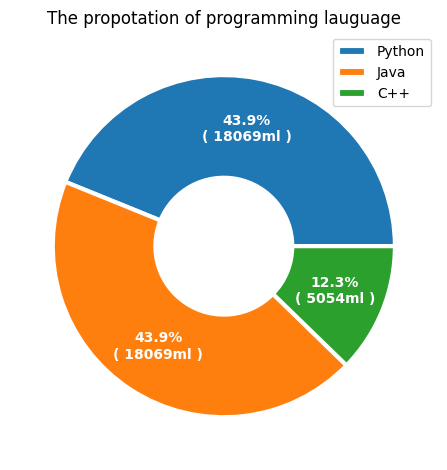

In [19]:
Python_sum = dta['Python']
Java_sum = dta['Python']
C_sum = dta['C++']
x = [Python_sum.sum(),Java_sum.sum(),C_sum.sum()]

def func(s,d):
    t = int(round(s/100.*sum(d)))     # 透過百分比反推原本的數值
    return f'{s:.1f}%\n( {t}ml )'     # 使用文字格式化的方式，顯示內容

plt.pie(x, labels = ['Python', 'Java','C++'],
        radius = 1,
        autopct = lambda i: func(i, x),
        wedgeprops = {'edgecolor':'w', 'linewidth':3, 'width':0.6},
        textprops={'weight':'bold','size': 10, 'color':'w'},
        pctdistance=0.7,
        )
plt.title('The propotation of programming lauguage')
plt.legend(fontsize = 10)
plt.tight_layout()
plt.show()

In [10]:
# 切割時間
dta['Year'] = dta['Week'].str.split('/').str.get(2)
dta['Month'] =  dta['Week'].str.split('/').str.get(0)
dta

,Week,Python,Java,C++,Year,Month
0,4/21/2019,55,55,18,2019,4
1,4/28/2019,52,50,16,2019,4
2,5/5/2019,56,56,17,2019,5
3,5/12/2019,56,61,18,2019,5
4,5/19/2019,57,56,17,2019,5
...,...,...,...,...,...,...
257,3/24/2024,79,47,19,2024,3
258,3/31/2024,81,51,19,2024,3
259,4/7/2024,77,45,18,2024,4
260,4/14/2024,78,48,19,2024,4


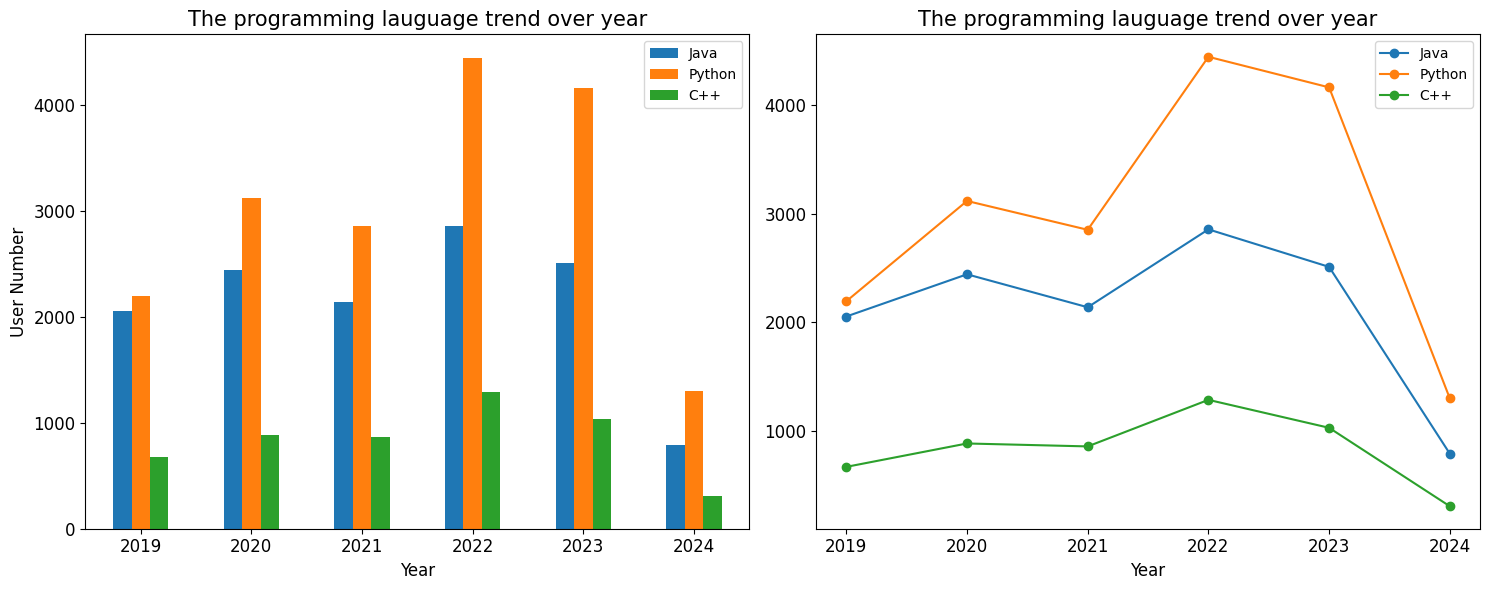

In [20]:
program_year = dta.groupby(['Year']).sum()[['Java','Python','C++']]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (15,6))

program_year.plot(kind = 'bar', rot = 0 , ax = ax1,fontsize =12)
ax1.set_xlabel('Year',fontsize = 12)
ax1.set_ylabel('User Number', fontsize = 12)
ax1.set_title('The programming lauguage trend over year', fontsize =15)

program_year.plot(kind = 'line', linestyle = '-',marker ='o', ax= ax2, fontsize =12)
ax2.set_title('The programming lauguage trend over year', fontsize =15)
ax2.set_xlabel('Year',fontsize = 12)
plt.tight_layout()
plt.show()

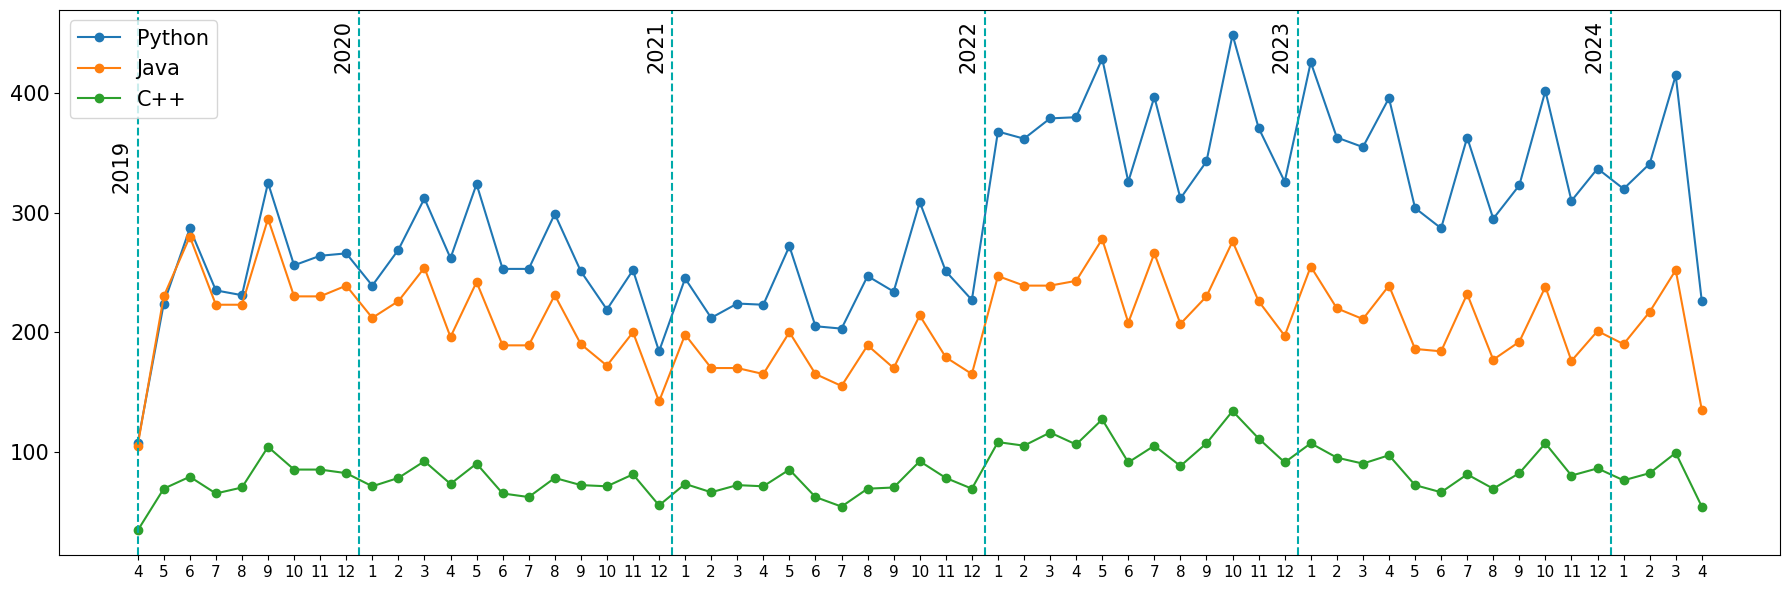

In [26]:
program_month = dta.groupby(['Year','Month']).sum()[['Python','Java','C++']].reset_index()
program_month['Month'] = program_month['Month'].astype(int)
program_month_sorted = program_month.sort_values(['Year', 'Month'])
program_month_sorted['Month'] = program_month_sorted['Month'].astype(str)
Year = ['2019','2020','2021','2022','2023','2024']

fig = plt.figure(figsize = (18,6))
plt.plot(range(len(program_month_sorted)),program_month_sorted['Python'], label = 'Python', marker ='o')
plt.plot(range(len(program_month_sorted)),program_month_sorted['Java'], label = 'Java', marker ='o')
plt.plot(range(len(program_month_sorted)),program_month_sorted['C++'], label = 'C++', marker ='o')
for i, name in enumerate(Year):
    if name == '2019':
        plt.axvline(x = 0 + i*12, ymax=400, linestyle='--', color ='#00AAAA')
        plt.text(-1 + i*12, 320, name, rotation=90, fontsize = 15)
    else:
        plt.axvline(x = 8.5 + (i-1)*12, ymax=400, linestyle='dashed', color ='#00AAAA')
        plt.text(7.5 + (i-1)*12, 420, name, rotation=90, fontsize = 15)
plt.xticks(range(len(program_month_sorted)), program_month_sorted['Month'], fontsize = 11)
plt.yticks(fontsize = 15)
plt.legend(loc = 'upper left',fontsize = 15)
plt.tight_layout()
plt.show()


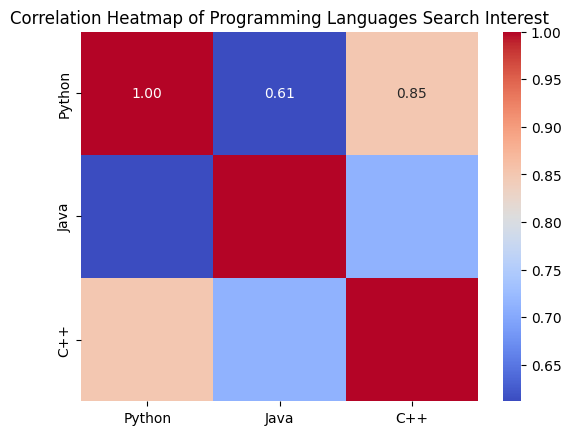

In [48]:
import seaborn as sns
correlation = dta.iloc[:,1:4]
correlation.index = dta['Week']

sns.heatmap(correlation.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Programming Languages Search Interest')
plt.show()